In [1]:
import sys
import os
#sys.path.insert(0, "/usr/src/app/app")
def import_path(fullpath):
    """ 
    Import a file with full path specification. Allows one to
    import from anywhere, something __import__ does not do. 
    """
    path, filename = os.path.split(fullpath)
    filename, ext = os.path.splitext(filename)
    sys.path.append(path)
    module = __import__(filename)
   # reload(module) # Might be out of date
    del sys.path[-1]
    return module
import_path("/usr/src/app/app")

<module 'app' from '/usr/src/app/app/__init__.py'>

In [2]:
from PIL import Image

from app.pkg.ml.autotags.autotag import AutoTagger
from app.pkg.ml.buffer_converters import BytesConverter

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
at = AutoTagger()

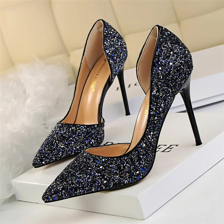

In [4]:
fp = "/usr/src/app/data/example/woman_shoes.png"

tags = {"cloth_subcategory":["blose", "jacket", "sweater", "t-shirt",  "military jacket","pants","trousers", "boots", "shoes", "sneakers", "sport shoes"],
        
        "season":["winter clothes", "summer clothes", "autumn clothes", "spring clothes"],
        "category":["dress","upper garment", "lower garment", "shoe"], # "shoes", "upper body clothing", "bottom body clothing", 
        "male":["women's clothing", "men's clothing", "unisex clothing"],
        }
image = Image.open(fp)
inp_data = {"image":at.bytes_converter.image_to_bytes(image), "tags":tags}

image.resize((224,224))

In [5]:
probs_dict = at.forward(input_data=inp_data)

In [6]:
probs_dict


{'cloth_subcategory': {'blose': 0.677,
  'jacket': 0.467,
  'sweater': 0.389,
  't-shirt': 0.606,
  'military jacket': 0.471,
  'pants': 0.669,
  'trousers': 0.664,
  'boots': 0.753,
  'shoes': 1.0,
  'sneakers': 0.775,
  'sport shoes': 0.842},
 'season': {'winter clothes': 0.92,
  'summer clothes': 0.969,
  'autumn clothes': 0.804,
  'spring clothes': 1.0},
 'category': {'dress': 0.762,
  'upper garment': 0.683,
  'lower garment': 0.68,
  'shoe': 1.0},
 'male': {"women's clothing": 1.0,
  "men's clothing": 0.946,
  'unisex clothing': 0.723}}